# Lesopdracht Matplotlib

- Voer onderstaande cel uit om de dataset te laden.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
store_date = pd.read_csv('walmart.csv', parse_dates = ['Date'])
store_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   State         6435 non-null   object        
 2   City          6435 non-null   object        
 3   Date          6435 non-null   datetime64[ns]
 4   Type          6435 non-null   object        
 5   IsHoliday     6435 non-null   bool          
 6   Weekly_Sales  6435 non-null   float64       
 7   Size          6435 non-null   float64       
 8   Temperature   6435 non-null   float64       
 9   Fuel_Price    6435 non-null   float64       
 10  MarkDown1     2280 non-null   float64       
 11  MarkDown2     1637 non-null   float64       
 12  MarkDown3     2046 non-null   float64       
 13  MarkDown4     1965 non-null   float64       
 14  MarkDown5     2295 non-null   float64       
 15  CPI           6435 non-null   float64 

### Algemeen
In deze les maak je meerdere visualisaties. Zorg bij iedere visualisatie minimaal voor het volgende:
- grafiektitel
- x-as titel
- y-as titel
- Legenda (indien van toepassing)

### 1 Omzet per week
- Voer onderstaande cel uit om het dataframe total_date aan te maken.

In [2]:
total_date = store_date.groupby('Date')[['Weekly_Sales']].sum()
total_date.head()

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30


- Maak een grafiek waarin je de omzet per week (Weekly_Sales) toont.
    - Hint: Maak gebruik van plt.xticks() om de datums van de x-as te roteren (om de leesbaarheid te vergroten).

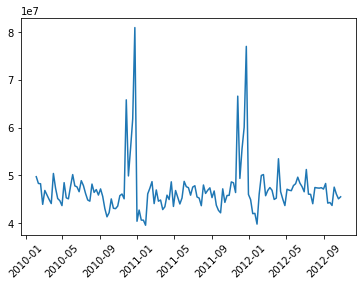

In [3]:
fig, ax = plt.subplots()

ax.plot(total_date.index, total_date.Weekly_Sales)
plt.xticks(rotation=45)

plt.show()

### 2 Omzet per jaar vergelijken
- Voer onderstaande cel uit om een dataframe per jaar aan te maken.

In [4]:
ten = store_date[store_date['Year'] == 2010].groupby('Week')[['Weekly_Sales', 'MD Total']].sum()
eleven = store_date[store_date['Year'] == 2011].groupby('Week')[['Weekly_Sales', 'MD Total']].sum()
twelve = store_date[store_date['Year'] == 2012].groupby('Week')[['Weekly_Sales', 'MD Total']].sum()
eleven.head()

,Weekly_Sales,MD Total
Week,,
1,42775787.77,0.0
2,40673678.04,0.0
3,40654648.03,0.0
4,39599852.99,0.0
5,46153111.12,0.0


- Maak een grafiek met daarin 3 lijndiagrammen:
    - De omzet per week van 2010
    - De omzet per week van 2011
    - De omzet per week van 2011
    
- We hebben niet alle gegevens van 2010 en 2012 tot onze beschikking. Van 2010 hebben we gegevens vanaf week 5 en van 2012 hebben slechts gegevens tot en met week 43. Maak gebruik van ax.annotate om pijlen in de grafiek te zetten om aan te geven vanaf wanneer we gegevens hebben en tot en met wanneer we gegevens hebben.

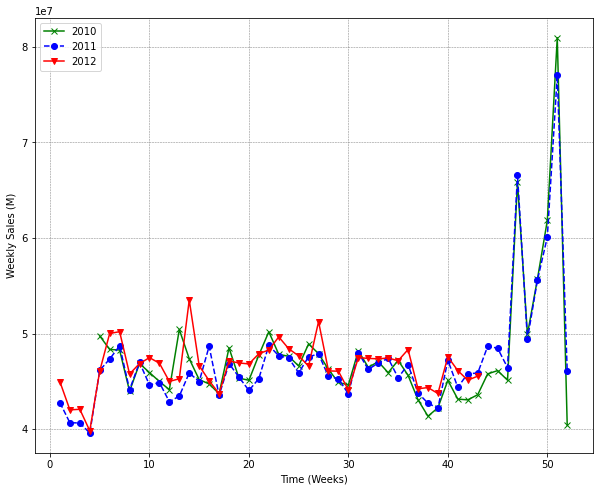

In [5]:
%matplotlib inline
fig, ax = plt.subplots()

# setting up 1 line per year
ax.plot(ten.index, ten["Weekly_Sales"], marker="x", linestyle=None,color="g")
ax.plot(eleven.index, eleven["Weekly_Sales"], marker="o", linestyle="--", color="b")
ax.plot(twelve.index, twelve["Weekly_Sales"], marker="v", color="r")

# setting labels
ax.set_xlabel("Time (Weeks)")
ax.set_ylabel("Weekly Sales (M)")

# some visual changes
ax.legend(["2010", "2011", "2012"])
fig.set_figheight(8)
fig.set_figwidth(10)
plt.grid(color='grey', linestyle='--', linewidth=0.5)

ax.annotate("No 2010 data < week 5", xy=(5, 5), xytext=(10, 7), arrowprops=dict(arrowstyle="->"))
ax.annotate("No 2012 data > week 43", xy=(43, 4.5), xytext=(35, 7), arrowprops={})

plt.show()

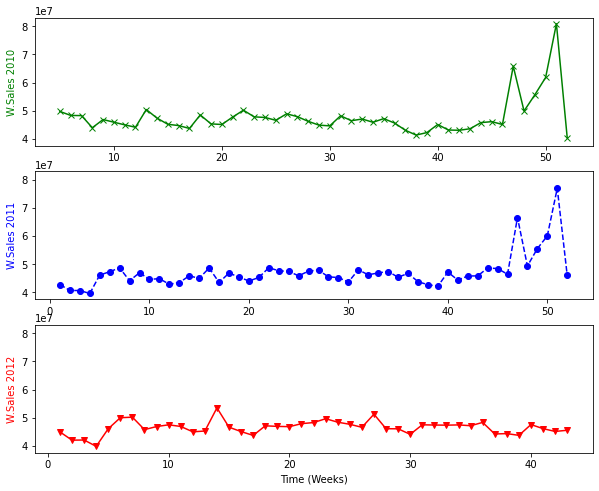

In [6]:
fig, ax = plt.subplots(3,1, sharey=True)
ax.shape

ax[0].plot(ten.index, ten["Weekly_Sales"], marker="x", linestyle=None,color="g")
ax[0].set_ylabel("W.Sales 2010",color="g")

ax[1].plot(eleven.index, eleven["Weekly_Sales"], marker="o", linestyle="--", color="b")
ax[1].set_ylabel("W.Sales 2011",color="b")

ax[2].plot(twelve.index, twelve["Weekly_Sales"], marker="v", color="r")
ax[2].set_ylabel("W.Sales 2012",color="r")

ax[2].set_xlabel("Time (Weeks)")
fig.set_figheight(8)
fig.set_figwidth(10)
plt.show()

### 3 Omzet en afprijzingen vergelijken
- Voer onderstaande cel uit om het dataframe eleven49 aan te maken. Dit dataframe is nodig omdat de afprijzingen (MD Total) pas beginnen van week 49 van 2011. Dit dataframe gebruik je om de afprijzingen van 2011 te tonen. 
- Naast dit dataframe heb je ook de eerder gebruikte dataframes ten, eleven en twelve nodig.

In [7]:
eleven49 = eleven.loc[49:]
eleven49

,Weekly_Sales,MD Total
Week,,
49,55561147.70,543504.94
50,60085695.94,304978.33
51,76998241.31,226611.49
52,46042461.04,2082326.49


- Maak een visualisatie aan waarin drie grafieken onder elkaar worden getoond:

     - In de bovenste grafiek toon je de omzet (Weekly_Sales) van 2010 in een blauwe lijn. De afprijzingen zijn voor 2010 nog niet beschikbaar.  
     - In de middelste grafiek toon je de omzet (Weekly_Sales) van 2011 met een blauwe lijn en de afprijzingen (MD Total) van 2011 met een rode lijn. Voor de afprijzingen maak je gebruik van eleven49. Zorg ervoor dat de kleur van de tekst op de y-assen overeenkomt met de kleuren van de lijnen.
     - In de onderste grafiek toon je de omzet (Weekly_Sales) van 2012 in een blauwe lijn en de afprijzingen (MD Total) van 2012 in een rode lijn. Zorg ervoor dat de kleur van de tekst op de y-assen overeenkomt met de kleuren van de lijnen.
 
Voor de grafieken van 2011 en 2012 heb je twee y-assen nodig: een as voor de omzet en een as voor de afprijzingen. Deze assen zijn alvast voor je aangemaakt.
    

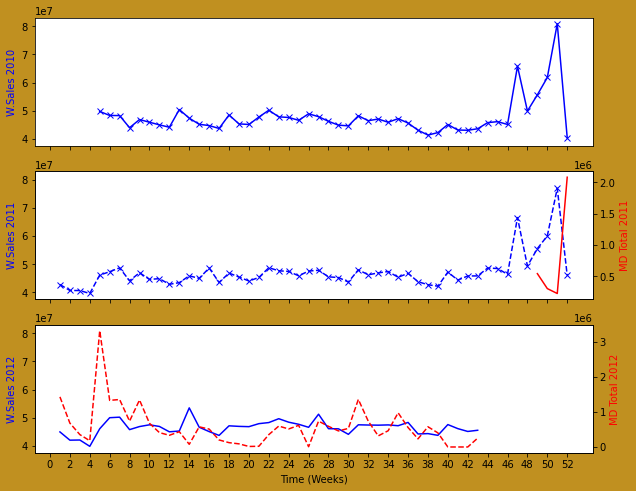

In [28]:
#aanmaken van ax[0], ax[1] en ax[2]:
fig, ax = plt.subplots(3,1, sharex=True, sharey=True)

#aanmaken van extra assen:
ax12 = ax[1].twinx()
ax22 = ax[2].twinx()

#begin hier met coderen:
#2010 (no twin)
ax[0].plot(ten.index, ten["Weekly_Sales"], marker="x" ,color="b")
ax[0].set_ylabel("W.Sales 2010",color="b")

#2011
ax[1].plot(eleven.index, eleven["Weekly_Sales"], marker="x", linestyle="--", color="b")
ax[1].set_ylabel("W.Sales 2011",color="b")
ax12.plot(eleven49.index, eleven49["MD Total"] , color = "r")
ax12.set_ylabel("MD Total 2011",color="r")

#2012
ax[2].plot(twelve.index, twelve["Weekly_Sales"], color="b")
ax[2].set_ylabel("W.Sales 2012",color="b")
ax[2].set_xlabel("Time (Weeks)")

ax22.plot(twelve.index, twelve["MD Total"], color="r", linestyle= "--")
ax22.set_ylabel("MD Total 2012", color="r")

#extra:
fig.set_figheight(8)
fig.set_figwidth(10)
fig.set(facecolor = "#C09020")
week_numbers = [*range(0,53,2)]
ax22.set_xticks(week_numbers)

#tonen
plt.show()


In [24]:
week_numbers = [*range(0,53,1)]
week_numbers

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52]